In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv('telemarketing_train.csv')

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
3,32,management,single,university.degree,no,no,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,32,technician,single,university.degree,no,yes,yes,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [37]:
df_num=df[['age', 'duration', 'campaign', 'pdays',
       'previous',  'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8


In [38]:
df_cat=df[['marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']]
df_cat.head()

,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,married,basic.9y,no,yes,no,cellular,aug,wed,success
1,single,university.degree,no,yes,no,cellular,jun,mon,nonexistent
2,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
3,single,university.degree,no,no,no,telephone,may,tue,nonexistent
4,single,university.degree,no,yes,yes,cellular,nov,fri,nonexistent


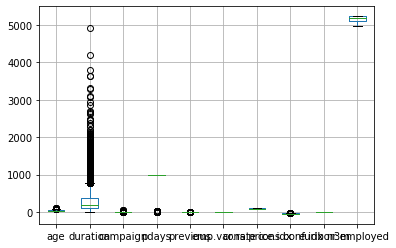

In [41]:
%matplotlib inline
df_num.boxplot()

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_num) 
scaled_df = pd.DataFrame(scaler.transform(df_num))
scaled_df.columns = df_num.columns
scaled_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545


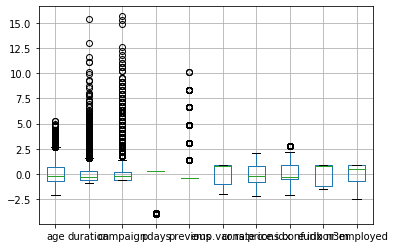

In [109]:
scaled_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b74435790>,
      dtype=object)

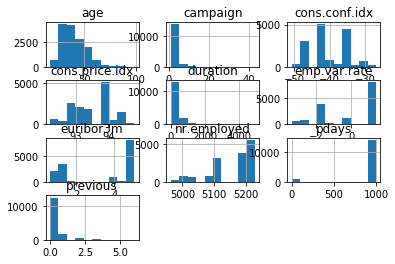

In [70]:
%matplotlib inline

df_num.hist()

In [93]:
dummies = pd.get_dummies(df_cat)#,drop_first=True)   
dummies.head()

,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [110]:
df2=pd.concat([scaled_df,dummies,df['target']],axis=1)

In [111]:
df2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,...,0,0,0,0,1,0,0,1,0,0
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,...,0,0,0,0,1,0,0,1,0,0
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,...,0,1,0,0,0,0,1,0,0,0
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,1,0,0,0,0,0,1,0,0


In [112]:
df2.to_csv('telemarketing_train_preprocess.csv',index=False)